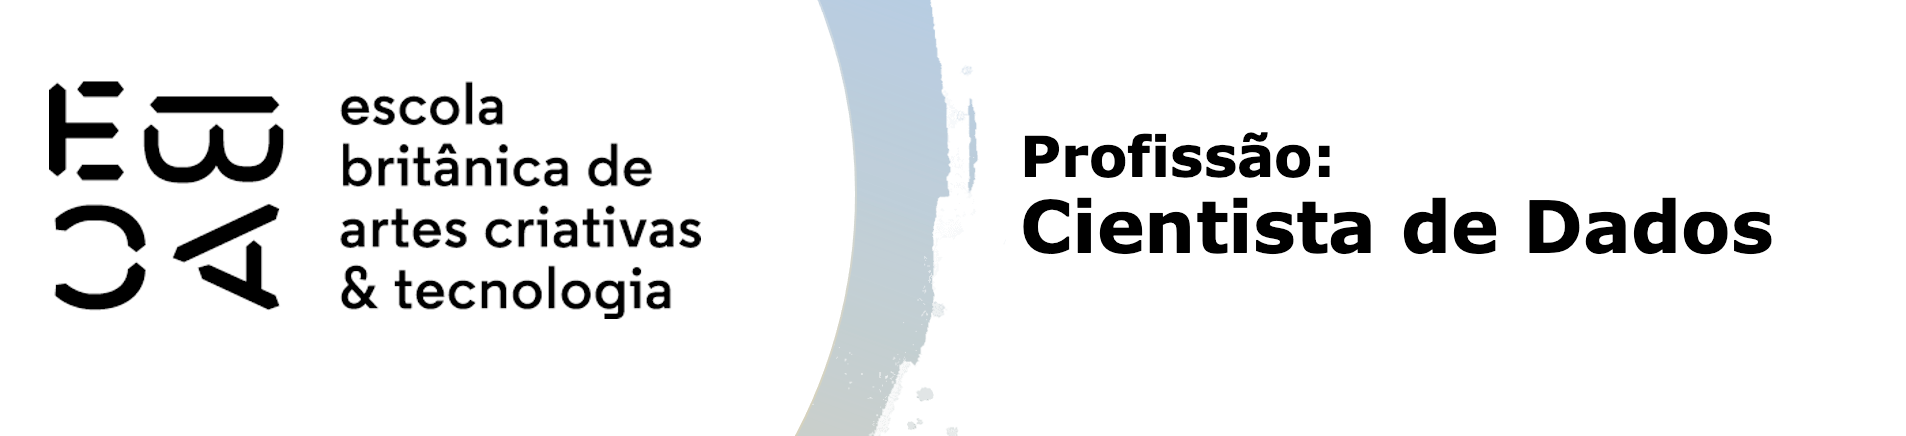

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import seaborn as sns

In [32]:
df = pd.read_csv('data/previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


Substituindo Missing pela Média

In [33]:
df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)
df.isna().sum()

data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [34]:
df['data_ref'] = pd.to_datetime(df['data_ref'])
date_holdout = df['data_ref'].max() - pd.DateOffset(months=3)
df_train = df[df['data_ref'] < date_holdout].copy()
df_holdout = df[df['data_ref'] >= date_holdout].copy()

In [35]:
model = smf.ols('I(np.log(renda)) ~ sexo + \
                                  posse_de_veiculo + \
                                  posse_de_imovel + \
                                  tipo_renda + \
                                  educacao + \
                                  estado_civil + \
                                  tipo_residencia + \
                                  idade + \
                                  tempo_emprego', data=df_train).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       I(np.log(renda))   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                 1.993e+04
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:22:59   Log-Likelihood:            -7.2536e+05
No. Observations:              550000   AIC:                         1.451e+06
Df Residuals:                  549977   BIC:                         1.451e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            8.0044      0.017    479.921      0.000       7.972       8.037
sexo[T.M]                            0.1386      0.003     48.079      0.000       0.133       0.144
posse_de_veiculo[T.S]                0.0022      0.003      0.804      0.421      -0.003       0.008
posse_de_imovel[T.S]                 0.1846      0.003     68.912      0.000       0.179       0.190
tipo_renda[T.Bolsista]              -0.2202      0.055     -3.998      0.000      -0.328      -0.112
tipo_renda[T.Empresário]             0.1402      0.003     45.376      0.000       0.134       0.146
tipo_renda[T.Pensionista]           -0.2990      0.004    -67.767      0.000      -0.308      -0.290
tipo_renda[T.Servidor público]       0.1282      0.005     28.153      0.000       0.119       0.137
educacao[T.Médio]                    0.0276      0.012      2.393      0.017       0.005       0.050
educacao[T.Pós graduação]            0.1770      0.040      4.480      0.000       0.100       0.254
educacao[T.Superior completo]        0.1597      0.012     13.662      0.000       0.137       0.183
educacao[T.Superior incompleto]      0.0552      0.013      4.221      0.000       0.030       0.081
estado_civil[T.Separado]             0.0205      0.005      3.813      0.000       0.010       0.031
estado_civil[T.Solteiro]             0.0025      0.004      0.655      0.512      -0.005       0.010
estado_civil[T.União]                0.0092      0.005      1.969      0.049    4.31e-05       0.018
estado_civil[T.Viúvo]                0.0110      0.006      1.737      0.082      -0.001       0.023
tipo_residencia[T.Casa]             -0.0904      0.011     -8.590      0.000      -0.111      -0.070
tipo_residencia[T.Com os pais]      -0.0588      0.012     -4.934      0.000      -0.082      -0.035
tipo_residencia[T.Comunitário]      -0.1492      0.021     -7.021      0.000      -0.191      -0.108
tipo_residencia[T.Estúdio]          -0.1324      0.018     -7.444      0.000      -0.167      -0.098
tipo_residencia[T.Governamental]    -0.0913      0.013     -7.294      0.000      -0.116      -0.067
idade                                0.0043      0.000     28.167      0.000       0.004       0.005
tempo_emprego                        0.1289      0.000    599.600      0.000       0.128       0.129
==============================================================================
Omnibus:                     1185.077   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1150.192
Skew:                          -0.096   Prob(JB):                    1.73e-250
Kurtosis:                       2.885   Cond. No.                     2.07e+03
==============================================================

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?

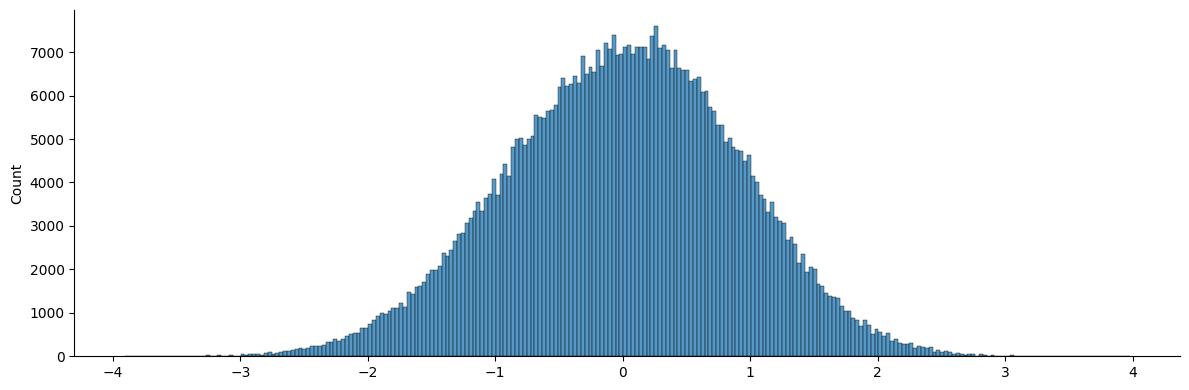

In [37]:
sns.displot(model.resid, height=4, aspect=3);

Verifique a independência dos resíduos
- Faça um gráfico dos resíduos versus os valores preditos

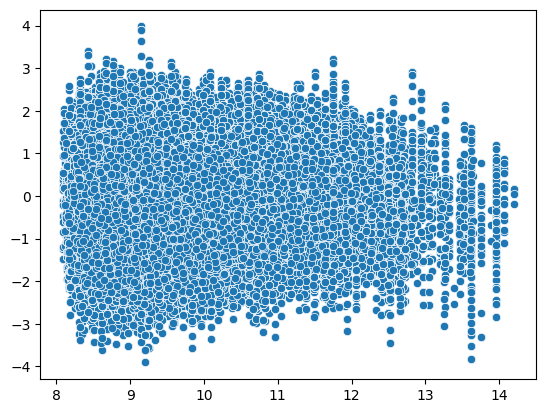

In [38]:
sns.scatterplot(x = model.predict(), y = model.resid);

- Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo

In [39]:
columns = ['sexo', 
           'posse_de_veiculo', 
           'posse_de_imovel', 
           'tipo_renda',
           'educacao',
           'estado_civil',
           'tipo_residencia',
           'idade',
           'tempo_emprego']

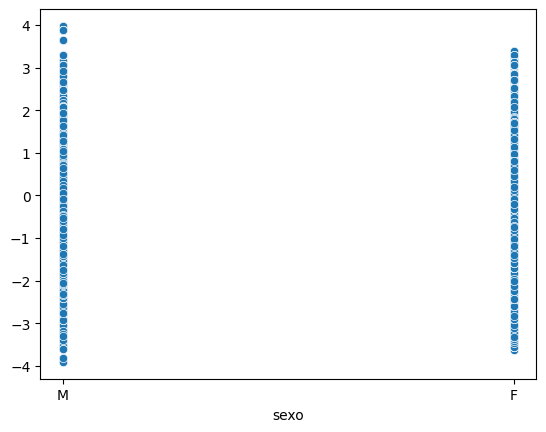

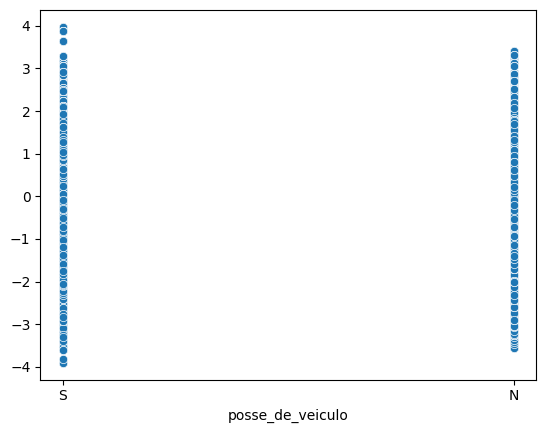

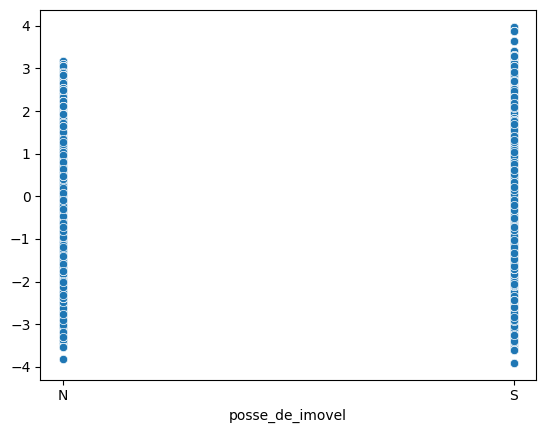

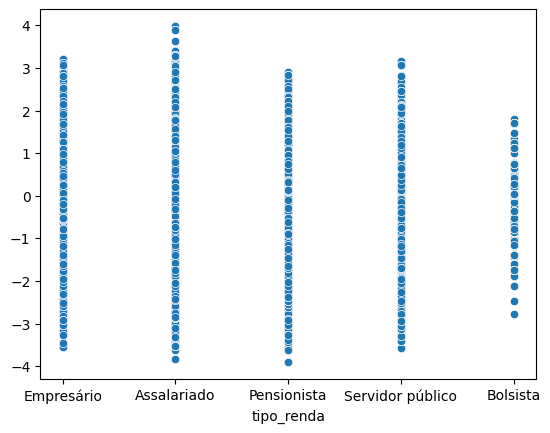

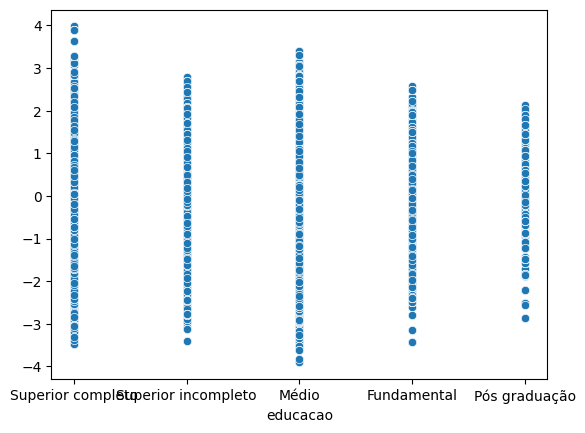

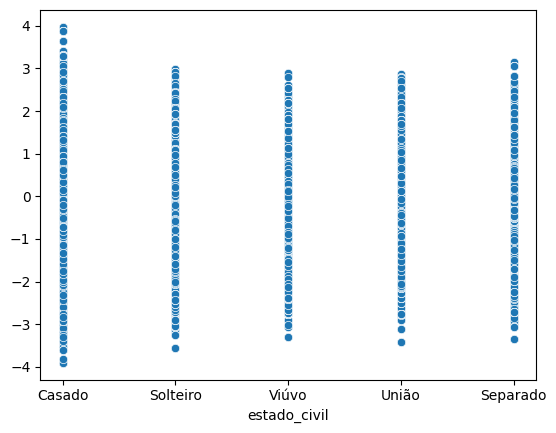

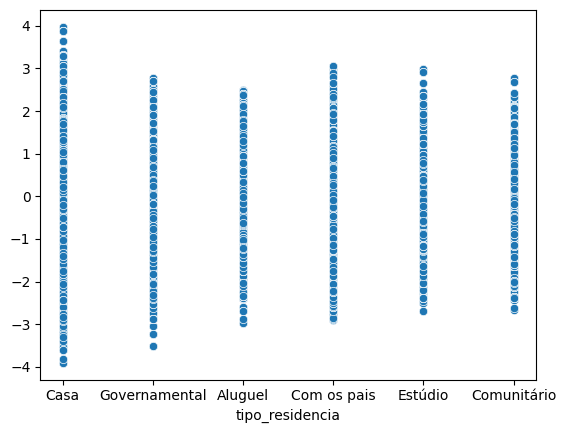

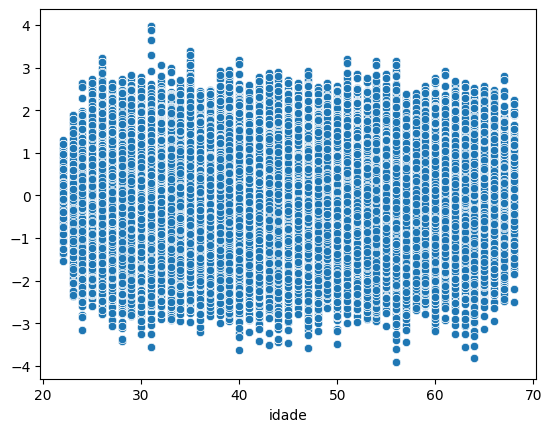

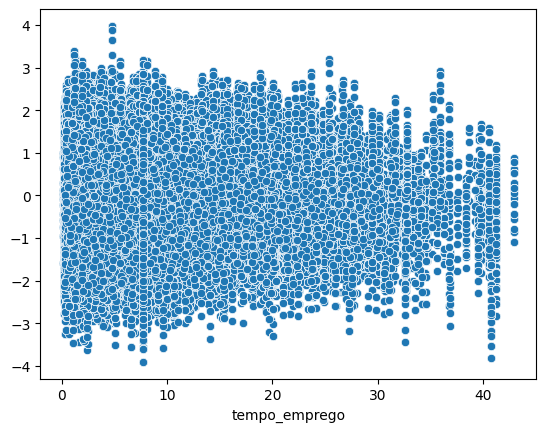

In [40]:
for c in columns:
    plt.figure()
    sns.scatterplot(x = df_train[c], y = model.resid);
    plt.show()

- Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência

In [47]:
df_aux = df_train.copy()
df_aux['mes_ref'] = df_aux['data_ref'].dt.month
df_aux['resid'] = model.resid

<AxesSubplot: xlabel='mes_ref', ylabel='resid'>

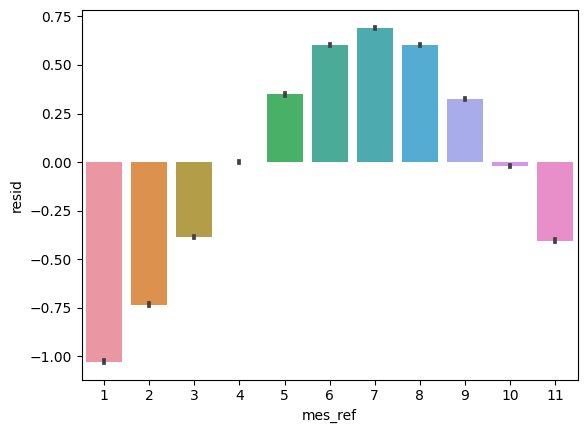

In [52]:
mean_res = df_aux[['mes_ref', 'resid']].groupby('mes_ref').mean()
sns.barplot(x='mes_ref', y='resid', data=df_aux)

<div style="background: #EEEEF4; padding: 15px 20px; border-radius: 5px; margin-top: 20px">
    <p style="font-size: 11px; color: #666; font-weight: bold">Observação</p>
    <p>A média dos resíduos variam conforme o mês do ano. Início do ano há uma média negativa (nosso modelo erra para mais) enquanto no meio do ano a média é positiva (nosso modelo erra para menos)</p>
</div>

- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

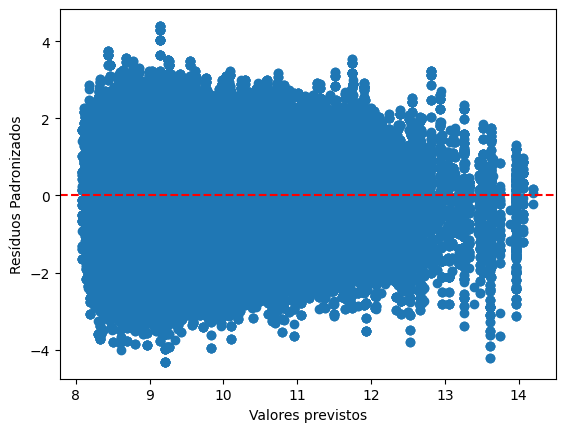

In [53]:
residuos_padronizados = model.resid / np.std(model.resid)

plt.scatter(model.predict(), residuos_padronizados)
plt.xlabel('Valores previstos')
plt.ylabel('Resíduos Padronizados')
plt.axhline(0, color='r', linestyle='--')
plt.show()

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

<div style="background: #EEEEF4; padding: 15px 20px; border-radius: 5px; margin-top: 20px">
    <p style="font-size: 11px; color: #666; font-weight: bold">Resposta</p>
    <p>Aparentemente as suposições estão atendidas. Os resíduos são normalmente distribuidos, independentes entre si e posuem a mesma variância</p>
</div>

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

In [58]:
df_train.shape[0]*0.001

550.0

In [63]:
model_resuzido = smf.ols('I(np.log(renda)) ~ sexo + \
                                  posse_de_veiculo + \
                                  posse_de_imovel + \
                                  tipo_renda + \
                                  educacao + \
                                  estado_civil + \
                                  tipo_residencia + \
                                  idade + \
                                  tempo_emprego', data=df_train.sample(frac=0.01)).fit()

In [64]:
st_model = model_resuzido.outlier_test()

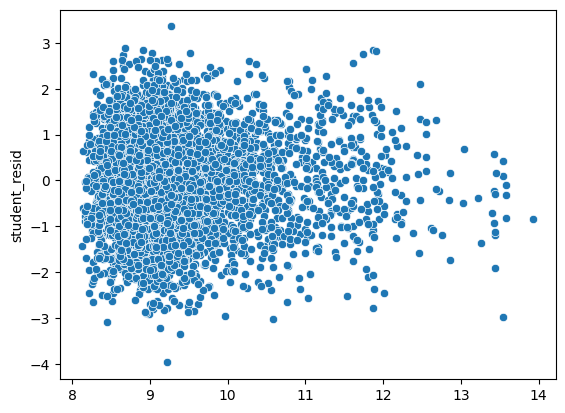

In [65]:
sns.scatterplot(x = model_resuzido.predict(), y = st_model.student_resid);

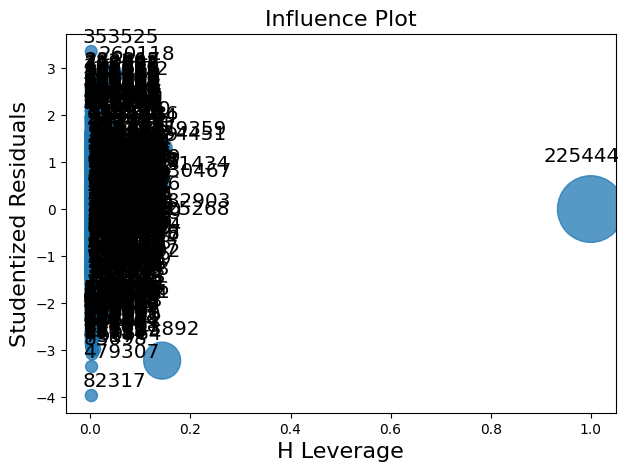

In [68]:
fig = sm.graphics.influence_plot(model_resuzido, criterion="cooks")
fig.tight_layout(pad=1.0)

In [69]:
df_train.iloc[225444,]

data_ref                 2015-05-01 00:00:00
index                                    591
sexo                                       F
posse_de_veiculo                           N
posse_de_imovel                            S
qtd_filhos                                 0
tipo_renda                          Bolsista
educacao                   Superior completo
estado_civil                          Casado
tipo_residencia                         Casa
idade                                     51
tempo_emprego                       10.69589
qt_pessoas_residencia                    2.0
renda                                9221.76
Name: 225444, dtype: object

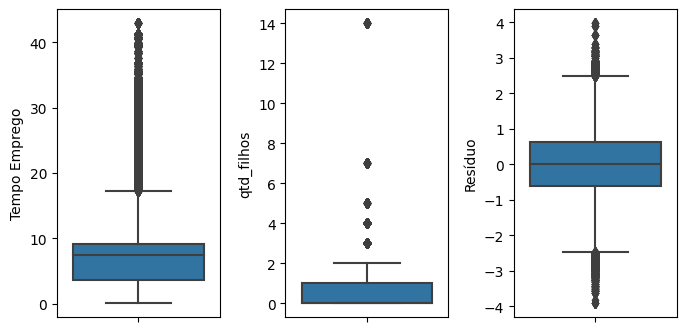

In [102]:
fix, ax = plt.subplots(1, 3, figsize=(8,4))
plt.subplots_adjust(wspace=.4, hspace=0)

sns.boxplot(y = 'tempo_emprego',data=df_train, ax=ax[0])
sns.boxplot(y = 'qtd_filhos',data=df_train, ax=ax[1])
sns.boxplot(y = model.resid ,data=df_train, ax=ax[2]);

ax[0].set_ylabel('Tempo Emprego')
ax[2].set_ylabel('Filhos')
ax[2].set_ylabel('Resíduo');

In [78]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
index,550000.0,8321.874044,4811.397029,0.000000,4143.000000,8331.000000,12496.000000,1.664900e+04
qtd_filhos,550000.0,0.432907,0.738001,0.000000,0.000000,0.000000,1.000000,1.400000e+01
idade,550000.0,43.793080,11.228574,22.000000,34.000000,43.000000,53.000000,6.800000e+01
tempo_emprego,550000.0,7.748815,6.103790,0.117808,3.635616,7.471233,9.090411,4.290685e+01
qt_pessoas_residencia,550000.0,2.211829,0.902519,1.000000,2.000000,2.000000,3.000000,1.500000e+01
renda,550000.0,29526.448427,103634.462144,141.250000,5020.280000,10618.950000,23281.970000,6.802261e+06


In [106]:
df_train[df['qtd_filhos'] > 7].shape

/var/folders/6x/3y02z1591rj130ytmr_hv8nh0000gn/T/ipykernel_42427/749388723.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[df['qtd_filhos'] > 7].shape


(59, 14)

<div style="background: #EEEEF4; padding: 15px 20px; border-radius: 5px; margin-top: 20px">
    <p style="font-size: 11px; color: #666; font-weight: bold">Resposta</p>
    <p>Pessoas com mais de 7 filhos aparentam serem outliers</p>
</div>

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
  

In [108]:
df_train.corr(method='spearman', numeric_only=True)

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
index,1.000000,0.029852,-0.047125,-0.029674,0.032076,-0.019839
qtd_filhos,0.029852,1.000000,-0.415284,-0.090340,0.828468,-0.019803
idade,-0.047125,-0.415284,1.000000,0.301351,-0.350057,0.114506
tempo_emprego,-0.029674,-0.090340,0.301351,1.000000,-0.058409,0.535931
qt_pessoas_residencia,0.032076,0.828468,-0.350057,-0.058409,1.000000,-0.007106
renda,-0.019839,-0.019803,0.114506,0.535931,-0.007106,1.000000


- VIF

In [136]:
columns_cat = ['sexo', 
           'posse_de_veiculo', 
           'posse_de_imovel', 
           'tipo_renda',
           'educacao',
           'estado_civil',
           'tipo_residencia']

columns_num = ['idade',
           'tempo_emprego',
               'qtd_filhos',
              'renda']

In [137]:
df_train_dum = pd.get_dummies(df_train[columns_cat], drop_first=True)
df_train_dum.head()

,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor público,educacao_Médio,educacao_Pós graduação,educacao_Superior completo,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [138]:
df_train_aux = pd.concat([df_train_dum, df_train[columns_num]], axis=1)
df_train_aux.head()
df_train_aux.columns = df_train_aux.columns.str.replace(' ', '_')

In [139]:
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_train_aux, i) for i in range(df_train_aux.shape[1])]
vars_vif["Feature"] = df_train_aux.columns

vars_vif.round(2)

,VIF Factor,Feature
0,1.80,sexo_M
1,1.96,posse_de_veiculo_S
2,3.23,posse_de_imovel_S
3,1.00,tipo_renda_Bolsista
4,1.47,tipo_renda_Empresário
5,2.18,tipo_renda_Pensionista
6,1.21,tipo_renda_Servidor_público
7,30.80,educacao_Médio
8,1.06,educacao_Pós_graduação
9,16.01,educacao_Superior_completo


## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [140]:
df_train_aux = df_train_aux[df_train_aux['qtd_filhos'] < 7].copy()

In [141]:
exclude_var = ['educacao_Médio', 'tipo_residencia_Casa', 'idade', 'estado_civil_União', 'tipo_residencia_Com_os_pais', 'tipo_residencia_Governamental', 'tipo_renda_Bolsista']
variables = [var for var in df_train_aux.columns if var not in exclude_var]
formula = 'I(np.log(renda)) ~ ' + ' + '.join(variables)

In [142]:
model = smf.ols(formula, data=df_train_aux).fit()

In [143]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       I(np.log(renda))   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                 3.071e+04
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:25:37   Log-Likelihood:            -7.0290e+05
No. Observations:              549871   AIC:                         1.406e+06
Df Residuals:                  549853   BIC:                         1.406e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        8.2219      0.003   2350.314      0.000       8.215       8.229
sexo_M                           0.1442      0.003     52.291      0.000       0.139       0.150
posse_de_veiculo_S               0.0043      0.003      1.637      0.102      -0.001       0.009
posse_de_imovel_S                0.1682      0.003     66.868      0.000       0.163       0.173
tipo_renda_Empresário            0.1324      0.003     44.626      0.000       0.127       0.138
tipo_renda_Pensionista          -0.1723      0.004    -48.933      0.000      -0.179      -0.165
tipo_renda_Servidor_público      0.1295      0.004     29.626      0.000       0.121       0.138
educacao_Pós_graduação           0.1177      0.036      3.238      0.001       0.046       0.189
educacao_Superior_completo       0.1122      0.003     43.269      0.000       0.107       0.117
educacao_Superior_incompleto    -0.0170      0.006     -2.771      0.006      -0.029      -0.005
estado_civil_Separado            0.0243      0.005      4.732      0.000       0.014       0.034
estado_civil_Solteiro           -0.0325      0.004     -8.859      0.000      -0.040      -0.025
estado_civil_Viúvo               0.0274      0.006      4.534      0.000       0.016       0.039
tipo_residencia_Comunitário     -0.0743      0.018     -4.168      0.000      -0.109      -0.039
tipo_residencia_Estúdio         -0.0302      0.014     -2.175      0.030      -0.057      -0.003
tempo_emprego                    0.1068      0.000    474.479      0.000       0.106       0.107
qtd_filhos                      -0.0035      0.002     -2.017      0.044      -0.007   -9.68e-05
renda                         2.842e-06   1.31e-08    217.552      0.000    2.82e-06    2.87e-06
==============================================================================
Omnibus:                    60470.885   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           244347.672
Skew:                          -0.499   Prob(JB):                         0.00
Kurtosis:                       6.110   Cond. No.                     3.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
print(f'R-quadrado Ajustado: {model.rsquared_adj:.2%}')

R-quadrado Ajustado: 48.70%


<div style="background: #EEEEF4; padding: 15px 20px; border-radius: 5px; margin-top: 20px">
    <p style="font-size: 11px; color: #666; font-weight: bold">Resposta</p>
    <p>Conseguimos aumentar em 4% o R2 ajustado do modelo com as modificações realizadas</p>
</div>